In [166]:

# run my startup script
exec(open("../src/functions/fun_loadStartup.py").read())
# load my functions
exec(open("../src/functions/fun_loadMyFunctions.py").read())

%config InlineBackend.figure_format='png'


loaded my modules
loaded my own functions


In [167]:
### Load grid
grdFile = '../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc'
grid = loadRomsGrid(grdFile)

loading ROMS grid from ../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc


In [168]:
### Set file names
hisFilePath='../data/raw/'

In [169]:
import glob
chunks = {'ocean_time':1}
filelist = glob.glob(hisFilePath+'roms_fwd_outer1_0800*.nc')

def preprocessRemoveLastDay(ds):
    '''remove the last 7 timesteps from each file'''
    return ds.isel(ocean_time = slice(0,-7))

for files in filelist: 
    print(files)
    # filelist.append(files)
ds = xr.open_mfdataset(filelist,chunks, preprocess=preprocessRemoveLastDay, data_vars='minimal',compat='override',coords='minimal',parallel=True, join='right') 

ds

../data/raw/roms_fwd_outer1_08005.nc
../data/raw/roms_fwd_outer1_08009.nc


<xarray.Dataset>
Dimensions:        (IorJ: 317, Nstate: 11, boundary: 4, eta_psi: 316, eta_rho: 317, eta_u: 317, eta_v: 316, obc_adjust: 11, ocean_time: 48, s_rho: 30, s_w: 31, tracer: 2, xi_psi: 271, xi_rho: 272, xi_u: 271, xi_v: 272)
Coordinates:
  * s_rho          (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
  * s_w            (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
    lon_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    lat_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    lon_u          (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lat_u          (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lon_v          (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lat_v          (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lon_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lat_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2011-12-02 ... 2011-12-09T20:0...
Dimensions without coordinates: IorJ, Nstate, boundary, eta_psi, eta_rho, eta_u, eta_v, obc_adjust, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables: (12/132)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    shflux         (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 317, 272), meta=np.ndarray>
    ssflux         (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 317, 272), meta=np.ndarray>
    Tair           (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 317, 272), meta=np.ndarray>
    EminusP        (ocean_time, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 317, 272), meta=np.ndarray>
    sustr          (ocean_time, eta_u, xi_u) float64 dask.array<chunksize=(1, 317, 271), meta=np.ndarray>
    svstr          (ocean_time, eta_v, xi_v) float64 dask.array<chunksize=(1, 316, 272), meta=np.ndarray>
Attributes: (12/39)
    file:              roms_fwd_outer1.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             EAC OUTER GRID
    var_info:          varinfo.dat
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           ROMS/TOMS, Version 3.9, Friday - June 4, 2021 -  2:19:...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       EAC, ADJOINT, ADJUST_BOUNDARY, ADJUST_STFLUX, ADJUST_W...

In [170]:
### Load data
ssh=ds.zeta.load()
sst=ds.temp.isel(s_rho=-1).load()

In [171]:
# define function for calculating spatial mean
def indexMeanMetric(input,iRange,jRange):
    iRange=range(iRange[0],iRange[1]+1)
    jRange=range(jRange[0],jRange[1]+1)
    output = input.isel(eta_rho=iRange, xi_rho=jRange).mean(dim='eta_rho', skipna=True).mean(dim='xi_rho', skipna=True)
    return output


In [172]:
    ssh_metric = indexMeanMetric(ssh, iRange=range(100,200), jRange=range(80,90))
    sst_metric = indexMeanMetric(sst, iRange=range(100,200), jRange=range(80,90))


In [173]:
ssh_metric
sst_metric

<xarray.DataArray 'temp' (ocean_time: 48)>
array([19.8109479 , 19.88829885, 19.93930672, 19.95474839, 19.94633987,
       19.98233672, 20.26734412, 20.71317688, 20.59393142, 20.37829843,
       20.27721771, 20.24335127, 20.18737668, 20.03621782, 19.90841552,
       19.84180126, 19.82273116, 19.82589774, 19.89761586, 20.03717089,
       20.14746239, 20.1619756 , 20.13170714, 20.10505743, 20.12638225,
       20.19079591, 20.17534825, 20.13047658, 20.10201706, 20.08759752,
       20.141273  , 20.17442513, 20.19825923, 20.19325958, 20.17450637,
       20.17946795, 20.21241795, 20.2416668 , 20.23897908, 20.21163124,
       20.20139973, 20.22689273, 20.40582274, 20.52398674, 20.45101498,
       20.36492804, 20.29771208, 20.29462744])
Coordinates:
    s_rho       float64 -0.004799
  * ocean_time  (ocean_time) datetime64[ns] 2011-12-02 ... 2011-12-09T20:00:00

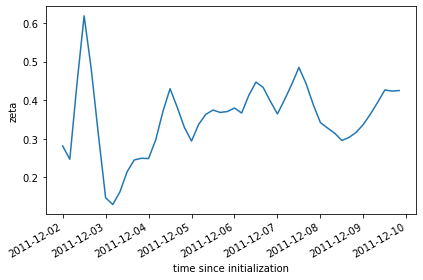

In [178]:
ssh_metric.plot()
plt.tight_layout()

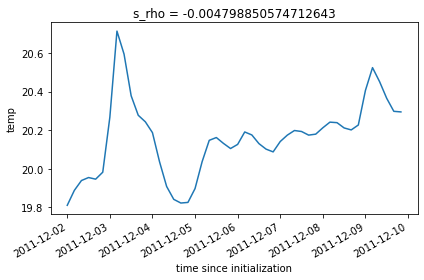

In [176]:
sst_metric.plot()
plt.tight_layout()